# Transfer Learning from MobileNet - Dog vs Cats vs Horses
This notebook contains the code that support [the blog on transfer learning.](https://towardsdatascience.com/keras-transfer-learning-for-beginners-6c9b8b7143e) 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet
from keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.optimizers import Adam

## Imports The MobileNet Model
Imports the mobilenet model and **discards the last 1000 neuron layer**.

In [3]:
base_model=MobileNet(weights='imagenet',include_top=False) 

17225924/17225924 [==============================] - 0s 0us/step


## Add layers of our own
We add dense layers so that the model can learn more complex functions and classify for better results. 

In [4]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x) 
preds=Dense(3,activation='softmax')(x) # 3 -> 4


*   Specify the inputs
*   Specify the outputs

Now a model has been created based on our architecture 🏆

In [5]:
model=Model(inputs=base_model.input,outputs=preds)

Layers & models also feature a boolean attribute `trainable`. Its value can be changed.
Setting `layer.trainable` to `False` moves all the layer's weights from trainable to
non-trainable.  This is called "freezing" the layer: the state of a frozen layer won't
be updated during training (either when training with `fit()` or when training with
 any custom loop that relies on `trainable_weights` to apply gradient updates).<br> 
 When a trainable weight becomes non-trainable, its value is no longer updated during
 training.

**Example: setting `trainable` to `False`**<br><br>
**Very Importent** : The setting of `trainable` are **Recursive** <br>
If you set `trainable = False` on a model or on any layer that has sublayers,
all children layers become non-trainable as well.


In [6]:
for layer in model.layers[:-4]:
    layer.trainable=False

## Data Preprocessing


In [7]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/exercise-3/Transfer Learning/train', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 197 images belonging to 3 classes.


In [91]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) 
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/exercise-3/Transfer Learning/test',
                                            target_size = (224, 224),
                                            color_mode='rgb',
                                            batch_size = 32,
                                            class_mode='categorical',
                                            shuffle=True)

Found 37 images belonging to 3 classes.


## Compiling the NN

In [9]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Training

In [10]:
step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator, steps_per_epoch=step_size_train, epochs=5)

<ipython-input-10-4936950dfce7>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator, steps_per_epoch=step_size_train, epochs=5)


Epoch 1/5
6/6 [==============================] - 14s 2s/step - loss: 2.1861 - accuracy: 0.4061
Epoch 2/5
6/6 [==============================] - 7s 1s/step - loss: 0.2925 - accuracy: 0.9062
Epoch 3/5
6/6 [==============================] - 7s 1s/step - loss: 0.1328 - accuracy: 0.9636
Epoch 4/5
6/6 [==============================] - 9s 2s/step - loss: 0.1067 - accuracy: 0.9636
Epoch 5/5
6/6 [==============================] - 12s 2s/step - loss: 0.0405 - accuracy: 0.9818


In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                      

## Visualization of the Loss


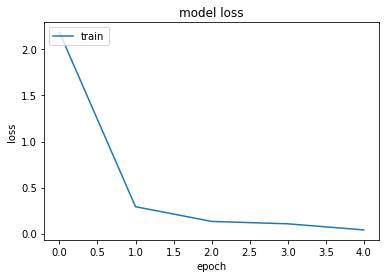

In [12]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

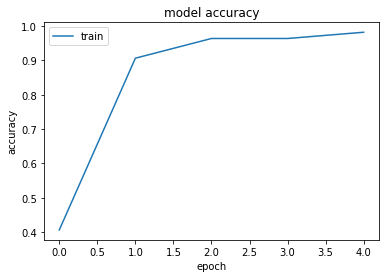

In [13]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Train's loss and accuracy

In [17]:
for key, val in history.history.items(): 
  print(f'{key} : {round(val[-1], 2)}')

loss : 0.04
accuracy : 0.98


## Test Model

In [119]:
#evaluate and print test accuracy
score = model.evaluate_generator(test_set, 
test_set.samples)
print(f'\n\nTest accuracy: {score[1]}')

<ipython-input-119-e4faad616a1a>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_set,




Test accuracy: 0.7297297120094299


## Single Prediction

In [14]:
in_classes = {y:x for x,y in train_generator.class_indices.items()}
in_classes

{0: 'cats', 1: 'dogs', 2: 'horses'}

1/1 [==============================] - 0s 66ms/step
Model predicted: horses


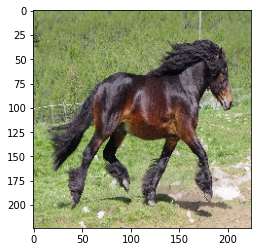

In [22]:
from keras.preprocessing import image
test_image = keras.utils.load_img('/content/drive/MyDrive/exercise-3/Transfer Learning/single/horse2.jpg', target_size = (224, 224))
test_image = keras.utils.img_to_array(test_image)
test_image = test_image/255
test_image_as_batch = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image_as_batch)
result = np.argmax(result)
print(f'Model predicted: {in_classes[result]}')
plt.imshow(test_image)

## Let's see how MobileNet works without our model

In [133]:
mobile = keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 0s 0us/step


In [141]:
from keras.applications.mobilenet import preprocess_input
from keras.applications import imagenet_utils
def prepare_image():
    img = keras.utils.load_img('/content/drive/MyDrive/exercise-3/Transfer Learning/single/dog.jpg', target_size=(224, 224))
    img_array = keras.utils.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    plt.imshow(img)
    return preprocess_input(img_array_expanded_dims)

1/1 [==============================] - 0s 73ms/step


[[('n02099712', 'Labrador_retriever', 0.98478806),
  ('n02099601', 'golden_retriever', 0.010092873),
  ('n02087394', 'Rhodesian_ridgeback', 0.0035027475),
  ('n02108422', 'bull_mastiff', 0.00030803267),
  ('n04409515', 'tennis_ball', 0.00029089506)]]

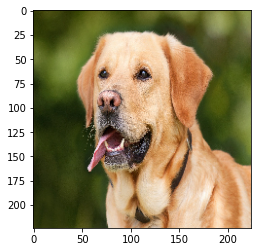

In [143]:
preprocessed_image = prepare_image()
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results